C:\Users\jazde\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in power
C:\Users\jazde\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in power


<IPython.core.display.Javascript object>


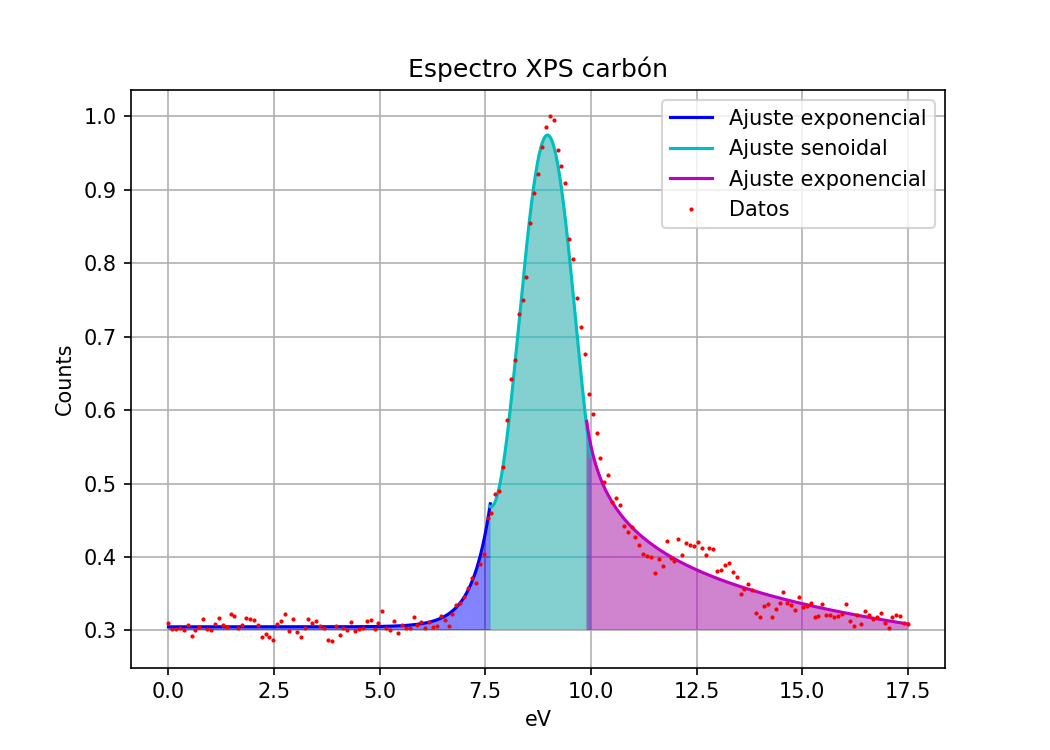

C:\Users\jazde\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in power


(2.436531884979174, 1.692574007923856, 2.8446935816068057, 6.9737994745098355)

In [138]:
%matplotlib notebook
import sympy as sy
sy.init_printing(use_latex='mathjax')

import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import scipy.optimize as opt

XPS=pd.read_excel("datos.xlsx")
x=np.linspace(0,17.5,191)#XPS["eV"]
y=XPS["Counts"]

y_norm=y / y.max(axis=0)


#Dividir la curva en 3 partes

#primera parte (exponencial)
a=y_norm[0:84]
xa=np.linspace(0,7.6,84)

#Primer ajuste
def obj(beta1,xa,a):
    f=beta1[0]+beta1[1]*np.exp(beta1[2]+(xa+beta1[3])**(beta1[4]))
    return np.sum((a-f)**2)

beta1=[0,1,0,0,0.2]
r1=opt.minimize(obj,beta1,args=(xa,a))

def f1(beta1,xa):
    return beta1[0]+beta1[1]*np.exp(beta1[2]+(xa+beta1[3])**(beta1[4]))

A=np.arange(0,7.619,1e-3)





#Segunda parte (senoidal)
b=y_norm[82:113]
xb=np.linspace(7.62,10.14,31)

def obj(beta2,xb,b):
    f=beta2[0]+beta2[1]*np.sin(beta2[2]*(xb+beta2[3]))
    return np.sum((b-f)**2)

beta2=[0,0,3,0]
r2=opt.minimize(obj,beta2,args=(xb,b))

def f2(beta2,xb):
    return beta2[0]+beta2[1]*np.sin(beta2[2]*(xb+beta2[3]))

B=np.arange(7.6,9.99,1e-3)





#Tercera parte (exponencial)
c=y_norm[111:191]
xc=np.linspace(10.14,17.5,80)

def obj(beta3,xc,c):
    f=beta3[0]+beta3[1]*np.exp(beta3[2]+(xc+beta3[3])**(beta3[4])) 
    return np.sum((c-f)**2)

beta3=[0,0,0,0,0]
r3=opt.minimize(obj,beta3,args=(xc,c))

def f3(beta3,xc):
    return beta3[0]+beta3[1]*np.exp(beta3[2]+(xc+beta3[3])**(beta3[4])) 

C=np.arange(9.9,17.5,1e-3)





#Calculando el área debajo de la curva
import scipy.integrate as inte
import scipy.special as special

result1 = inte.quad(lambda x: f1(r1.x,x), 0, 7.7)
result2 = inte.quad(lambda x: f2(r2.x,x), 7.7, 9.9)
result3 = inte.quad(lambda x: f3(r3.x,x), 9.9, 17.5)
tot=result1[0]+result2[0]+result3[0]


pt.figure(figsize=(7,5))
pt.title('Espectro XPS carbón')

pt.plot(A,f1(r1.x,A),'b',label='Ajuste exponencial')
pt.plot(B,f2(r2.x,B),'c',label='Ajuste senoidal')
pt.plot(C,f3(r3.x,C),'m',label='Ajuste exponencial')

pt.vlines(A,0.3,f1(r1.x,A),colors='b',lw=0.1, alpha=0.1)
pt.vlines(B,0.3,f2(r2.x,B),colors='c',lw=0.1, alpha=0.1)
pt.vlines(C,0.3,f3(r3.x,C),colors='m',lw=0.1, alpha=0.1)

pt.plot(x,y_norm,'or',ms=1,label='Datos')
pt.xlabel("eV")
pt.ylabel("Counts")
pt.legend(loc='best')
pt.grid(True)
result1[0],result2[0],result3[0],tot